# **2110433 - Computer Vision (2023/2)**
#**Lab 8 - Convolutional Neural Network [Homework]** <br>
In this lab, we will learn how to use Convolutional Neural Network to perform image classification in the provided real world dataset using PyTorch. This notebook includes both coding and written questions. Please hand in this notebook file with all outputs and your answer.

**Collaboration is encouraged in this course.** You must turn in your own write ups of all problems. If you collaborate with others, you must put the names and ids of the students you worked with in below block.

Collaboration List:
- ...
- ...


# Assignment 1 : Food Image Classification
![alt text](https://cdn.pixabay.com/photo/2015/08/26/10/58/the-pork-fried-rice-made-908333_1280.jpg)

Classify 50 food menus from Chula-Food-50 dataset
 

In this assignment you have to replace YOUR_STUDENT_ID_WITH21 variable with your student id (in integer). There will be 2 sets of data: train and test 

By using the knowledge from the lab and lecture, you have to design your own CNN food image classification model and tested on unknown label dataset!



Scoreboard URL : https://www.piclab.ai/classes/cv2023/lab8/scoreboard

In [2]:
import random
import glob
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import matplotlib
from matplotlib import font_manager

import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, Subset
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision import models as models
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

##### Add Thai font ######

# !wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
font_manager.fontManager.addfont(path= 'thsarabunnew-webfont.ttf')
matplotlib.rc('font', family='TH Sarabun New')

##### Don't forget to put your ID here (in integer) ####
YOUR_STUDENT_ID_WITH21 = 6432085221
#######################################################

def isStudentIDValid(studentID):
  strID = str(studentID)
  isEndWith21 = strID.endswith('21')
  isLengthOK = len(strID) == 10
  if isEndWith21 and isLengthOK:
    return True
  else:
    return False

print('Student ID status:',isStudentIDValid(YOUR_STUDENT_ID_WITH21))

Student ID status: True


## Your model description goes here: ###
WRITE HERE

## GPU Status Check

In [4]:
!nvidia-smi

Sat Mar 23 01:57:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.23.08              Driver Version: 545.23.08    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4080        On  | 00000000:01:00.0  On |                  N/A |
|  0%   43C    P8              15W / 340W |    464MiB / 16376MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Download and inspect Chula-Food-50 dataset

In [5]:
# !wget  -O assets/Lab8/chula-food-50.zip https://piclab.ai/classes/cv2021/Chula-food-50.zip
# !unzip -qo chula-food-50.zip

In [6]:
### Helper function to display image from dataset ###
def getImageFromDataset(dataset, idx):
  sampleImage, sampleLabel = dataset.__getitem__(idx)
  ### Revert transformation ###
  sampleImage = ((sampleImage.permute(1,2,0).numpy() * np.array([0.229, 0.224, 0.225])) + np.array([0.485, 0.456, 0.406]))*255
  sampleImage = sampleImage.astype(np.uint8)
  sampleClassName = dataset.classes[sampleLabel]
  return sampleImage, sampleClassName

In [7]:
#### FILL Any Augmenetation HERE ####
transformTrain = transforms.Compose([
        transforms.Resize(size=(224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])

transformVal =  transforms.Compose([
        transforms.Resize(size=(224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
### Load Dataset ###
foodTrainDataset = ImageFolder('train/', transform=transformTrain)
# foodTestDataset = ImageFolder('foodpic/test/', transform=transformVal)

print('Number of classes:', len(foodTrainDataset.classes))

Number of classes: 50


In [8]:
### Split train and validation ###
TEST_SIZE = 0.1
SEED = 42
BATCH_SIZE = 16
# generate indices: instead of the actual data we pass in integers instead
train_indices, test_indices, _, _ = train_test_split(
    range(len(foodTrainDataset)),
    foodTrainDataset.targets,
    stratify=foodTrainDataset.targets,
    test_size=TEST_SIZE,
    random_state=SEED
)

# generate subset based on indices
train_split = Subset(foodTrainDataset, train_indices)
test_split = Subset(foodTrainDataset, test_indices)

## Dataset Visualization

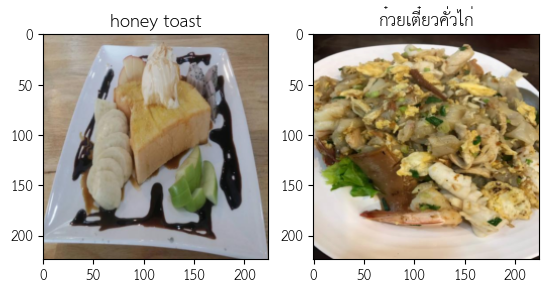

In [9]:
image1, image1ClassName = getImageFromDataset(foodTrainDataset, 0)
image2, image2ClassName = getImageFromDataset(foodTrainDataset, 1600)

_, figure = plt.subplots(1,2)

figure[0].imshow(image1,cmap='gray')
figure[0].set_title(image1ClassName)
figure[1].imshow(image2,cmap='gray')
figure[1].set_title(image2ClassName)
plt.show()

## Define CNN network for food classification
Hint
1. You can freely uses any structure/pretrained model to do this homework but don't forgot to cited them in this notebook.

   A very big collection of pretrained model can be found here : https://github.com/rwightman/pytorch-image-models

2. Don't forget to change mean and std in the pre-processing to match with your pretrained model.

In [ ]:
import os 

l = os.listdir('dataset/train/')
for idx, name in enumerate(l):
    print(str(idx) + ": " + name)

In [78]:
from glob import glob

thr = 0.1
with open('dataset/train.txt', 'w') as train_f, open('dataset/val.txt', 'w') as val_f:
    for idx, name in enumerate(glob('dataset/train/*/*')):
        nn = np.random.rand()
        if nn < thr:
            val_f.write('./' + name + '\n')
        else:
            train_f.write('./' + name + '\n')

In [90]:
import shutil

with open('dataset/train.txt', 'r') as f:
    for line in f:
        line = line.strip()
        fold = line.split('/')[3]
        if not os.path.exists('dataset/mytrain/' + fold):
            os.makedirs('dataset/mytrain/' + fold)
        shutil.copy(line, 'dataset/mytrain/' + fold)

with open('dataset/val.txt', 'r') as f:
    for line in f:
        line = line.strip()
        fold = line.split('/')[3]
        if not os.path.exists('dataset/myval/' + fold):
            os.makedirs('dataset/myval/' + fold)
        shutil.copy(line, 'dataset/myval/' + fold)

In [6]:
import multiprocessing

bind = "127.0.0.1:8000"
workers = multiprocessing.cpu_count() * 2 + 1
print(workers)

49


In [5]:
print(torch.get_num_threads())
print(torch.get_num_interop_threads())

16
24


In [9]:
from ultralytics import YOLO

torch.cuda.empty_cache()

yolo_model = YOLO('yolov8l-cls.pt')
config = {
    'model' : yolo_model,
    'data' : 'dataset',
    'epochs' : 30,
    'batch' : 48,
    'imgsz' : [512, 512],
    'device' : 0,
    'workers' : 20,
    'verbose' : True
}

100%|██████████| 71.7M/71.7M [01:25<00:00, 880kB/s] 


In [3]:
%env OPENBLAS_MAIN_FREE=1

env: OPENBLAS_MAIN_FREE=1


In [10]:
yolo_model.train(data=config['data'],
                        epochs=config['epochs'],
                        batch=config['batch'],
                        imgsz=config['imgsz'],
                        device=config['device'],
                        workers=config['workers'],
                        verbose=config['verbose'])

New https://pypi.org/project/ultralytics/8.1.31 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.16 🚀 Python-3.12.2 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 4080, 16071MiB)
engine/trainer: task=classify, mode=train, model=yolov8l-cls.pt, data=dataset, epochs=30, time=None, patience=100, batch=48, imgsz=[512, 512], save=True, save_period=-1, cache=False, device=0, workers=20, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_f

train: Scanning /home/andre/Desktop/CU_submission/chulacv2023/Lab8/dataset/train... 18007 images, 0 corrupt: 100%|██████████| 18007/18007 [00:00<?, ?it/s]
val: Scanning /home/andre/Desktop/CU_submission/chulacv2023/Lab8/dataset/val... 1993 images, 0 corrupt: 100%|██████████| 1993/1993 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.000375), 51 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 20 dataloader workers
Logging results to runs/classify/train4
Starting training for 30 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  5.02it/s]

                   all      0.773      0.941



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.98it/s]

                   all      0.817      0.958



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  5.01it/s]

                   all      0.813      0.956



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.79it/s]

                   all      0.826       0.96



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  5.07it/s]

                   all      0.839      0.956



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  5.09it/s]

                   all      0.861      0.966



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.89it/s]

                   all      0.871      0.969



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.76it/s]

                   all      0.875      0.964



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.82it/s]

                   all      0.877      0.971



      Epoch    GPU_mem       loss  Instances       Size


      10/30      13.1G     0.2482          7        512: 100%|██████████| 376/376 [01:45<00:00,  3.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.77it/s]

                   all      0.893      0.973



      Epoch    GPU_mem       loss  Instances       Size


      11/30      13.2G     0.2155          7        512: 100%|██████████| 376/376 [01:47<00:00,  3.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.88it/s]

                   all      0.885      0.974



      Epoch    GPU_mem       loss  Instances       Size


      12/30      13.1G     0.1948          7        512: 100%|██████████| 376/376 [01:46<00:00,  3.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.76it/s]

                   all      0.884      0.972



      Epoch    GPU_mem       loss  Instances       Size


      13/30      13.1G     0.1785          7        512: 100%|██████████| 376/376 [01:46<00:00,  3.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.88it/s]

                   all        0.9      0.975



      Epoch    GPU_mem       loss  Instances       Size


      14/30      13.1G     0.1576          7        512: 100%|██████████| 376/376 [01:43<00:00,  3.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.76it/s]

                   all      0.899      0.974



      Epoch    GPU_mem       loss  Instances       Size


      15/30      13.1G     0.1464          7        512: 100%|██████████| 376/376 [01:45<00:00,  3.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.81it/s]

                   all      0.896      0.973



      Epoch    GPU_mem       loss  Instances       Size


      16/30      13.1G      0.122          7        512: 100%|██████████| 376/376 [01:44<00:00,  3.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.81it/s]

                   all        0.9      0.975



      Epoch    GPU_mem       loss  Instances       Size


      17/30      13.1G     0.1135          7        512: 100%|██████████| 376/376 [01:45<00:00,  3.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.82it/s]

                   all      0.901      0.976



      Epoch    GPU_mem       loss  Instances       Size


      18/30      13.1G    0.09537          7        512: 100%|██████████| 376/376 [01:44<00:00,  3.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.83it/s]

                   all      0.905      0.975



      Epoch    GPU_mem       loss  Instances       Size


      19/30      13.1G      0.076          7        512: 100%|██████████| 376/376 [01:45<00:00,  3.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.78it/s]

                   all      0.902      0.974



      Epoch    GPU_mem       loss  Instances       Size


      20/30      13.1G    0.06543          7        512: 100%|██████████| 376/376 [01:45<00:00,  3.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.83it/s]

                   all      0.914      0.978



      Epoch    GPU_mem       loss  Instances       Size


      21/30      13.2G    0.06418          7        512: 100%|██████████| 376/376 [01:46<00:00,  3.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.78it/s]

                   all      0.911      0.978



      Epoch    GPU_mem       loss  Instances       Size


      22/30      13.1G    0.05936          7        512: 100%|██████████| 376/376 [01:45<00:00,  3.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.85it/s]

                   all      0.913      0.976



      Epoch    GPU_mem       loss  Instances       Size


      23/30      13.1G    0.04915          7        512: 100%|██████████| 376/376 [01:44<00:00,  3.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.88it/s]

                   all      0.916      0.977



      Epoch    GPU_mem       loss  Instances       Size


      24/30      13.1G    0.04547          7        512: 100%|██████████| 376/376 [01:45<00:00,  3.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.77it/s]

                   all      0.915      0.978



      Epoch    GPU_mem       loss  Instances       Size


      25/30      13.1G    0.04205          7        512: 100%|██████████| 376/376 [01:45<00:00,  3.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.81it/s]

                   all      0.918      0.977



      Epoch    GPU_mem       loss  Instances       Size


      26/30      13.1G    0.03828          7        512: 100%|██████████| 376/376 [01:44<00:00,  3.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.77it/s]

                   all      0.926      0.977



      Epoch    GPU_mem       loss  Instances       Size


      27/30      13.1G    0.02955          7        512: 100%|██████████| 376/376 [01:44<00:00,  3.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  5.05it/s]

                   all      0.924      0.977



      Epoch    GPU_mem       loss  Instances       Size


      28/30      13.1G    0.03026          7        512: 100%|██████████| 376/376 [01:46<00:00,  3.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  4.77it/s]

                   all      0.926      0.979



      Epoch    GPU_mem       loss  Instances       Size


      29/30      13.1G    0.02551          7        512: 100%|██████████| 376/376 [01:45<00:00,  3.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  5.07it/s]

                   all      0.925       0.98



      Epoch    GPU_mem       loss  Instances       Size


      30/30      13.1G    0.02478          7        512: 100%|██████████| 376/376 [01:45<00:00,  3.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  5.18it/s]

                   all      0.928      0.981



30 epochs completed in 0.929 hours.
Optimizer stripped from runs/classify/train4/weights/last.pt, 72.7MB
Optimizer stripped from runs/classify/train4/weights/best.pt, 72.7MB

Validating runs/classify/train4/weights/best.pt...
Ultralytics YOLOv8.1.16 🚀 Python-3.12.2 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 4080, 16071MiB)
YOLOv8l-cls summary (fused): 133 layers, 36248626 parameters, 0 gradients
train: /home/andre/Desktop/CU_submission/chulacv2023/Lab8/dataset/train... found 18007 images in 50 classes ✅ 
val: /home/andre/Desktop/CU_submission/chulacv2023/Lab8/dataset/val... found 1993 images in 50 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:04<00:00,  5.18it/s]


                   all      0.928      0.981
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train4
Results saved to runs/classify/train4


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x719e6020c560>
curves: []
curves_results: []
fitness: 0.9543401896953583
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9277471303939819, 'metrics/accuracy_top5': 0.9809332489967346, 'fitness': 0.9543401896953583}
save_dir: PosixPath('runs/classify/train4')
speed: {'preprocess': 0.15948217117301913, 'inference': 1.8280595615767858, 'loss': 0.00018757668441106372, 'postprocess': 3.2060300651891e-05}
task: 'classify'
top1: 0.9277471303939819
top5: 0.9809332489967346

In [11]:
bestModel = YOLO('runs/classify/train4/weights/best.pt')

# 43-s-20
# ''-m-20
# 2-m-30
# 4-l-30


res = bestModel.predict('test/', device='cuda', stream=False)
print(res[0].probs.top1)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/5000 /home/andre/Desktop/CU_submission/chulacv2023/Lab8/test/1.jpg: 512x512 honey toast 1.00, ขาหมูเยอรมัน 0.00, ขนมปังปิ้ง 0.00, แกงส้มชะอมกุ้ง 0.00, ฮะเก๋า 0.00, 3.1ms
image 2/5000 /home/andre/Desktop/CU_submission/chulacv2023/Lab8/test/10.jpg: 512x512 ข้าวหมูกรอบ 1.00, ข้าวหน้าเป็ด 0.00, ก๋วยจั๊บ 0.00, ข้าวหน้าเนื้อ 0.00, ขาหมูเยอรมัน 0.00, 3.3ms
image 3/5000 /home/andre/Desktop/CU_submission/chulacv2023/Lab8/test/100.jpg: 512x512 ทาโกะยากิ 

.

.

Example Result JSON <br>
resultDict = { 
  'studentID': 555555555521,
  'results':{
    '1.jpg':'ต้มเลือดหมู',
    '2.jpg':'บะหมี่แห้ง',
    ...
  }
}


In [12]:
print(len(res))
resultDict = {}
path = '/home/andre/Desktop/CU_submission/chulacv2023/Lab8/test/'
print(len(path))
# for i in res:
    
# print(res[0])
# print(res[0].path.strip(path))
# print(res[0].names[res[0].probs.top1])
for i in res:
    # name = i.path.strip(path)
    name = i.path[len(path):]
    resultDict[name] = i.names[i.probs.top1]
    # print(i.path)
    # print(name)

5000
56


In [16]:
print('{')
print('    "studentID": 6432085221,')
print('    "results": {')
for key, value in resultDict.items():
    print('        "' + key + '": "' + value + '",')
print('    }')
print('}')


{
    "studentID": 6432085221,
    "results": {
        "1.jpg": "honey toast",
        "10.jpg": "ข้าวหมูกรอบ",
        "100.jpg": "ทาโกะยากิ",
        "1000.jpg": "น้ำตกหมู",
        "1001.jpg": "ก๋วยจั๊บ",
        "1002.jpg": "ปูผัดผงกะหรี่",
        "1003.jpg": "ยำสาหร่าย",
        "1004.jpg": "ก๋วยเตี๋ยวคั่วไก่",
        "1005.jpg": "ข้าวผัดกระเทียม",
        "1006.jpg": "ข้าวหมูกรอบ",
        "1007.jpg": "ก๋วยเตี๋ยวคั่วไก่",
        "1008.jpg": "ปูผัดผงกะหรี่",
        "1009.jpg": "ขนมถ้วย",
        "101.jpg": "แกงส้มชะอมกุ้ง",
        "1010.jpg": "ยำแซลมอน",
        "1011.jpg": "ก๋วยเตี๋ยวคั่วไก่",
        "1012.jpg": "ข้าวผัดกระเทียม",
        "1013.jpg": "ไส้อั่ว",
        "1014.jpg": "ข้าวหมกไก่",
        "1015.jpg": "เป็ดพะโล้",
        "1016.jpg": "เป็ดย่าง",
        "1017.jpg": "แกงคั่วหอยขม",
        "1018.jpg": "ต้มเลือดหมู",
        "1019.jpg": "ชาบู",
        "102.jpg": "ไข่กระทะ",
        "1020.jpg": "ไข่กระทะ",
        "1021.jpg": "ปูนิ่มทอดกระเทียม",
        "1022.j

In [6]:
for i in range (1,5001):
    print(i, resultDict[str(i) + '.jpg'])
    assert(len(resultDict[str(i) + '.jpg']) >= 4)

1 honey toast
2 ชาบู
3 เป็ดพะโล้
4 น้ำพริกไข่ปู
5 ปอเปี๊ยะทอด
6 กระเพาะปลา
7 ปูนิ่มทอดกระเทียม
8 ไข่ตุ๋น
9 ก๋วยเตี๋ยวเรือ
10 ข้าวหมูกรอบ
11 ปอเปี๊ยะทอด
12 ชาบู
13 ก๋วยจั๊บญวน
14 ไข่กระทะ
15 น้ำตกหมู
16 สปาเก็ตตี้คาโบนาร่า
17 ไอศกรีม
18 ยำปลาดุกฟู
19 ก๋วยจั๊บ
20 ยำถั่วพลู
21 ไอศกรีม
22 ฮะเก๋า
23 ปูม้านึ่ง
24 สเต็กหมู
25 ขนมปัง
26 ข้าวผัดกระเทียม
27 ยำปลาดุกฟู
28 น้ำพริกไข่ปู
29 ก๋วยเตี๋ยวเรือ
30 สเต็กหมู
31 ข้าวหมกไก่
32 ปลากระพงนึ่งมะนาว
33 ไส้อั่ว
34 ปลากระพงนึ่งมะนาว
35 เกี๊ยวทอด
36 ต้มเลือดหมู
37 ก๋วยจั๊บญวน
38 ขนมปังสังขยา
39 ยำสาหร่าย
40 สปาเก็ตตี้คาโบนาร่า
41 สเต็กหมู
42 ก๋วยเตี๋ยวเรือ
43 ก๋วยเตี๋ยวคั่วไก่
44 ไอศกรีม
45 กระเพาะปลา
46 หมูมะนาว
47 เกี๊ยวทอด
48 ข้าวหน้าเนื้อ
49 ไข่ตุ๋น
50 ก๋วยจั๊บ
51 ขนมปังสังขยา
52 สปาเก็ตตี้ขี้เมาทะเล
53 ออส่วน
54 ต้มเลือดหมู
55 ยำหมูยอ
56 สปาเก็ตตี้คาโบนาร่า
57 ข้าวหน้าเป็ด
58 ปลากระพงนึ่งมะนาว
59 ฮะเก๋า
60 ฮะเก๋า
61 ข้าวหมกไก่
62 honey toast
63 ปลากระพงนึ่งมะนาว
64 น้ำตกหมู
65 ปอเปี๊ยะทอด
66 honey toast
67 สปาเก็ตตี้ขี้เมาทะเล
68 ขนมปัง
69 ออส่ว

In [ ]:
#### Design you network here ####
class foodNet(nn.Module):
  def __init__(self,):
    super(foodNet, self).__init__()
    ### Layers goes here ###
  def forward(self, input):
    ### Conntections goes here ###
    return ?

## Construct the model, optimizer and loss function

In [ ]:
#### FILL HERE ####
foodNet.cuda()

criterion = 
optimizer = 
scheduler =

foodTrainDatasetLoader = 
foodValDatasetLoader = 

## Train the model

In [ ]:
### Train and test helper function ###
def testModel(testDatasetLoader, net):
  net.eval()
  correctImages = 0
  totalImages = 0
  allLabels = []
  allPredicted = []
  testingProgressbar = tqdm(enumerate(testDatasetLoader), total=len(testDatasetLoader), ncols=100)
  with torch.no_grad():
    for batchIdx, batchData in testingProgressbar:
      images, labels = batchData
      
      images, labels = images.cuda(), labels.cuda()
      outputs = net(images)
      _, predicted = torch.max(outputs, 1)

      correctImages += (predicted == labels).sum().item()
      totalImages += labels.size(0)

      accumulateAccuracy = round((correctImages/totalImages)*100,4)
      testingProgressbar.set_description("Testing accuracy: {}".format(accumulateAccuracy ) )
    
      allLabels.append(labels)
      allPredicted.append(predicted)
  allLabels = torch.cat(allLabels).cpu().numpy()
  allPredicted = torch.cat(allPredicted).cpu().numpy()
  return correctImages, totalImages, allLabels, allPredicted

def trainAndTestModel(trainDatasetLoader, testDatasetLoader, net, optimizer,scheduler, criterion, trainEpoch):
  
  bestAccuracy = 0
  correctImages = 0
  totalImages = 0
  for currentEpoch in tqdm(range(trainEpoch), desc='Overall Training Progress:', ncols=100):
    trainingLoss = 0.0
    net.train()
    print('Epoch',str(currentEpoch+1),'/',str(trainEpoch))
    trainingProgressbar = tqdm(enumerate(trainDatasetLoader), total=len(trainDatasetLoader), ncols=100)
    for batchIdx, batchData in trainingProgressbar:
      images, labels = batchData
      images, labels = images.cuda(), labels.cuda()

      # zero the parameter gradients
      optimizer.zero_grad()

      # forward + backward + optimize
      outputs = net(images)
      loss = criterion(outputs, labels)
    
      _, predicted = torch.max(outputs, 1)
      correctImages += (predicted == labels).sum().item()
      totalImages += labels.size(0)
    
      loss.backward()
      optimizer.step()
      

      trainingLoss += loss.item()
      accumulateAccuracy = round((correctImages/totalImages)*100,4)
      trainingProgressbar.set_description("Training accuracy: {} loss: {}".format(accumulateAccuracy, round(loss.item(),4) ) )
    scheduler.step(trainingLoss)
    correctImages, totalImages, allLabels, allPredicted = testModel(testDatasetLoader, net)
    testAccuracy = round((correctImages/totalImages)*100,2)

    print('='*10)
    
    if testAccuracy > bestAccuracy:
      bestAccuracy = testAccuracy
      bestPredicted = allPredicted
      bestNet = net

  return bestAccuracy, bestPredicted, allLabels, bestNet

In [ ]:
bestAccuracy, bestPredicted, allLabels, bestNet = trainAndTestModel(??)

## Classify on validation set and send result to server!

In [13]:
from PIL import Image
import json
import requests

class ImageFolderWithPaths(Dataset):
    def __init__(self, root_dir, transform=None):
        self.imageFileNames = sorted(glob.glob(root_dir+'/*.jpg'))
        self.transform = transform
    
    def __getitem__(self, idx):
        imageData = Image.oppredicpath.basename(self.imageFileNames[idx])
        if self.transform is not None:
            imageData = self.transform(imageData)
        return imageFileName, imageData.unsqueeze(0)
    def __len__(self):
        return len(self.imageFileNames)



def generatePredictedResults(valDataset, net):
    net.eval()
    predictedResults = {}
    with torch.no_grad():
        for imageFileName, imageData in tqdm(valDataset, ncols=100):
            imageData = imageData.cuda()
            outputs = net(imageData)
            _, predicted = torch.max(outputs, 1)
            #print(imageFileName, predicted.item())
            predictedResults[imageFileName] =  foodTrainDataset.classes[predicted.item()]
    return predictedResults

def sendResult(predictedResults,studentID=6432085221):
    sendDict = { 'studentID':studentID, 'results':  predictedResults }
    print(sendDict)
    response = requests.post('https://www.piclab.ai/classes/cv2023/lab8/scoreboard/submit',headers={'Content-Type': 'application/json' }, json=sendDict)
    return response.text

Example Result JSON <br>
resultDict = { 
  'studentID': 555555555521,
  'results':{
    '1.jpg':'ต้มเลือดหมู',
    '2.jpg':'บะหมี่แห้ง',
    ...
  }
}


In [14]:
# foodTestDataset = ImageFolderWithPaths('test', transform=transformTest)
# predictedResults = generatePredictedResults(foodTestDataset, bestNet)
predictedResults = resultDict
print(sendResult(predictedResults, studentID=6432085221))

{'studentID': 6432085221, 'results': {'1.jpg': 'honey toast', '10.jpg': 'ข้าวหมูกรอบ', '100.jpg': 'ทาโกะยากิ', '1000.jpg': 'น้ำตกหมู', '1001.jpg': 'ก๋วยจั๊บ', '1002.jpg': 'ปูผัดผงกะหรี่', '1003.jpg': 'ยำสาหร่าย', '1004.jpg': 'ก๋วยเตี๋ยวคั่วไก่', '1005.jpg': 'ข้าวผัดกระเทียม', '1006.jpg': 'ข้าวหมูกรอบ', '1007.jpg': 'ก๋วยเตี๋ยวคั่วไก่', '1008.jpg': 'ปูผัดผงกะหรี่', '1009.jpg': 'ขนมถ้วย', '101.jpg': 'แกงส้มชะอมกุ้ง', '1010.jpg': 'ยำแซลมอน', '1011.jpg': 'ก๋วยเตี๋ยวคั่วไก่', '1012.jpg': 'ข้าวผัดกระเทียม', '1013.jpg': 'ไส้อั่ว', '1014.jpg': 'ข้าวหมกไก่', '1015.jpg': 'เป็ดพะโล้', '1016.jpg': 'เป็ดย่าง', '1017.jpg': 'แกงคั่วหอยขม', '1018.jpg': 'ต้มเลือดหมู', '1019.jpg': 'ชาบู', '102.jpg': 'ไข่กระทะ', '1020.jpg': 'ไข่กระทะ', '1021.jpg': 'ปูนิ่มทอดกระเทียม', '1022.jpg': 'ปลากระพงนึ่งมะนาว', '1023.jpg': 'เป็ดพะโล้', '1024.jpg': 'ข้าวหน้าเนื้อ', '1025.jpg': 'น้ำตกหมู', '1026.jpg': 'ฮะเก๋า', '1027.jpg': 'เค้ก', '1028.jpg': 'ขนมถ้วย', '1029.jpg': 'เกี๊ยวทอด', '103.jpg': 'บะหมี่แห้ง', '1030.jpg': 'สป